# Множественная линейная регрессия на чистых данных

Множественная регрессия - метод статистического анализа для моделирования зависимости одной зависимой переменной от двух или более независимых переменных.

y=b0+b1x1+b2x2+...e (случайная ошибка)

# Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None) # в датасете нет заголовков

In [3]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [4]:
x.shape, y.shape

((387, 5), (387, 1))

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
binary = LinearRegression()

Построим модель парной регрессии от одного из признаков в датасете.

По умолчанию в DataFrame индексация по столбцам. Взятие одного столбца возвращает не DataFrame, а одномерный массив Series. Для того, чтобы был датафрейм из одного столбца можно использовать x[[1]].

In [7]:
binary.fit(x[[1]], y)

LinearRegression()

In [8]:
binary.coef_

array([[95.52010745]])

In [9]:
binary.predict(x[[1]]) # рассчитывает теоретические значения признака

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

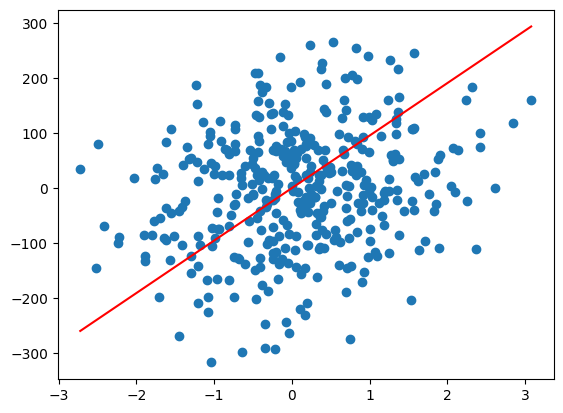

In [10]:
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1)) # равномерное распределение точек от мин до макс
plt.scatter(x[0], y)
plt.plot(xx, binary.predict(xx), c='r')

In [11]:
binary.score(x[[0]], y) # метрика эффективности полученной модели

-0.40944746350605143

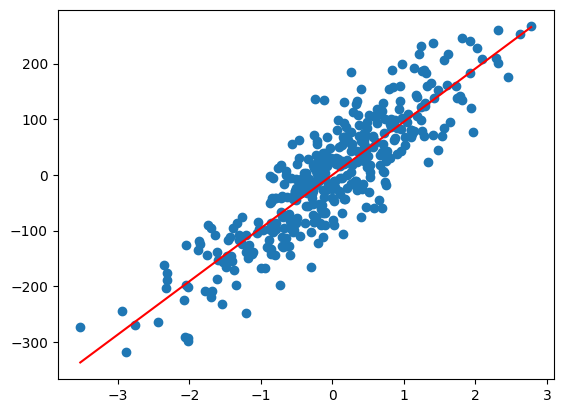

In [12]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.scatter(x[1], y)
plt.plot(xx, binary.predict(xx), c='r')

In [13]:
binary.score(x[[1]], y)

0.7699743283650629

In [14]:
multiple = LinearRegression() # для множественной регрессии те же шаги, но с полным датасетом
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

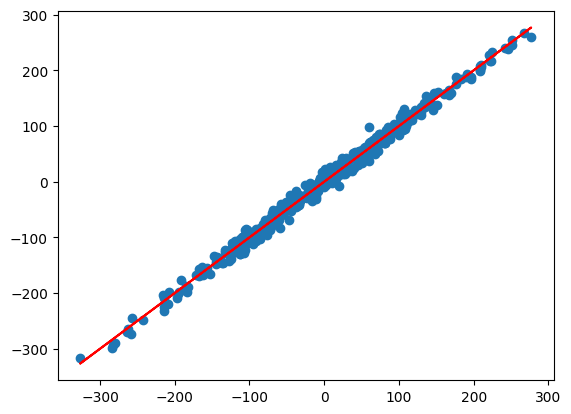

In [15]:
yy = multiple.predict(x) # график зависимости теор значений от эмпирических (как предсказания отличаются от истины)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# Задания для самостоятельного выполнения

*1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.*

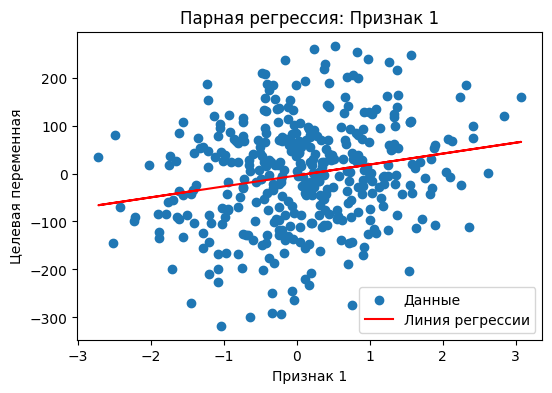

Признак 1 - b0 = -4.05666473187296, b1 = 22.7811134205866


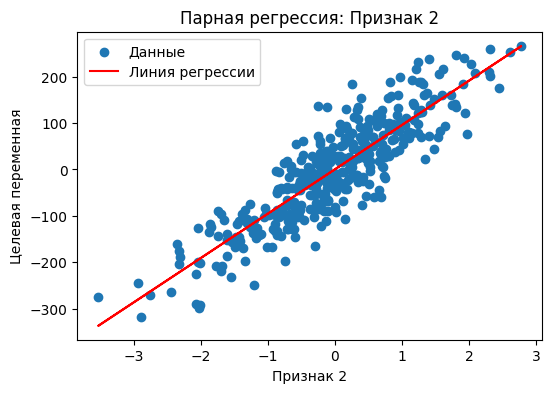

Признак 2 - b0 = 0.003320924502834277, b1 = 95.52010744785575


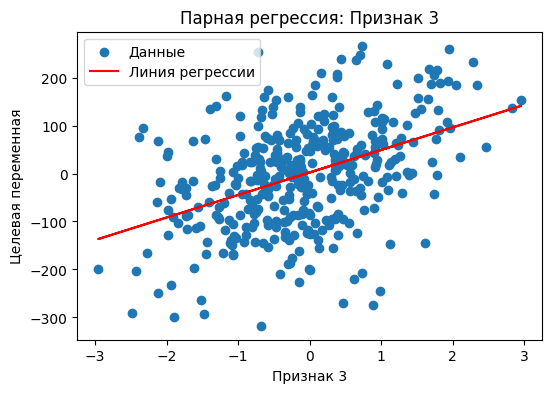

Признак 3 - b0 = 2.1934010808461943, b1 = 46.94897635119021


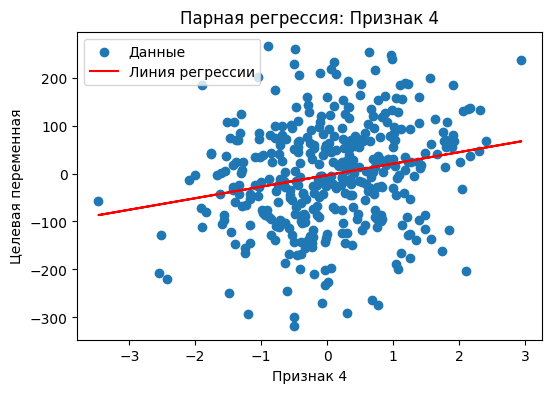

Признак 4 - b0 = -3.488249616549184, b1 = 23.998824072824334


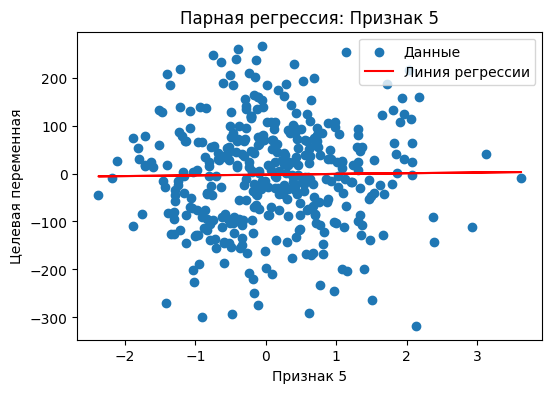

Признак 5 - b0 = -2.329709071771846, b1 = 1.4908204197891677


In [16]:
model = LinearRegression()

# проход по всем столбцам (признакам)
for i in range(x.shape[1]):
    plt.figure(figsize=(6, 4))

    model.fit(x[[i]], y)

    y_pred = model.predict(x[[i]])

    plt.scatter(x[i], y, label='Данные')
    plt.plot(x[i], y_pred, color='red', label='Линия регрессии')

    plt.title(f'Парная регрессия: Признак {i+1}')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.show()

    print(f'Признак {i+1} - b0 = {model.intercept_[0]}, b1 = {model.coef_[0][0]}')


*2. Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.*

Коэффициенты линейной регрессии:  [[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]
Свободный член:  [0.56498354]
Коэффициент детерминации R^2: 0.9922198026415868


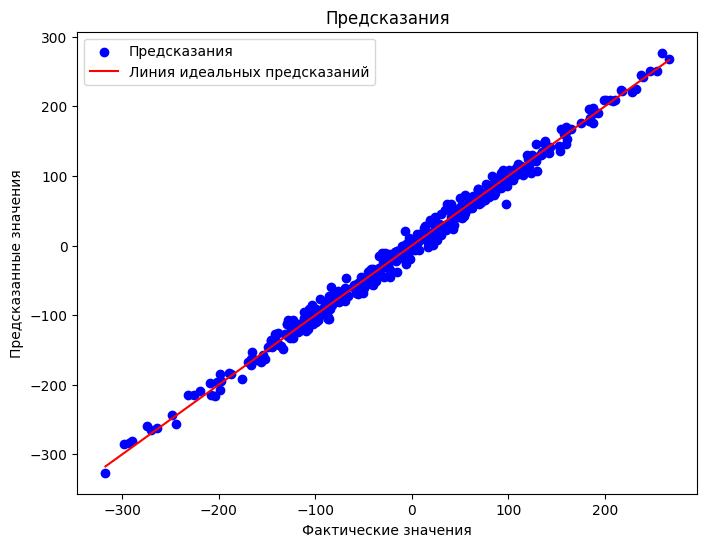

In [17]:
model = LinearRegression()

model.fit(x, y) # обучение на всех данных

print("Коэффициенты линейной регрессии: ", model.coef_)
print("Свободный член: ", model.intercept_)

y_pred = model.predict(x) # предсказания на основе модели

r2_score = model.score(x, y) # коэффициент детерминации
print(f"Коэффициент детерминации R^2: {r2_score}")

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label="Линия идеальных предсказаний")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Предсказания")
plt.legend()
plt.show()


*3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.*

Полиномиальная регрессия - связь между независимой переменной (признаками) и зависимой переменной моделируется как полином заданной степени.

y=w0+w1x+w2*x^2+w3*x^3+...+e (e - ошибка модели: разница между предсказанными и реальными значениями)

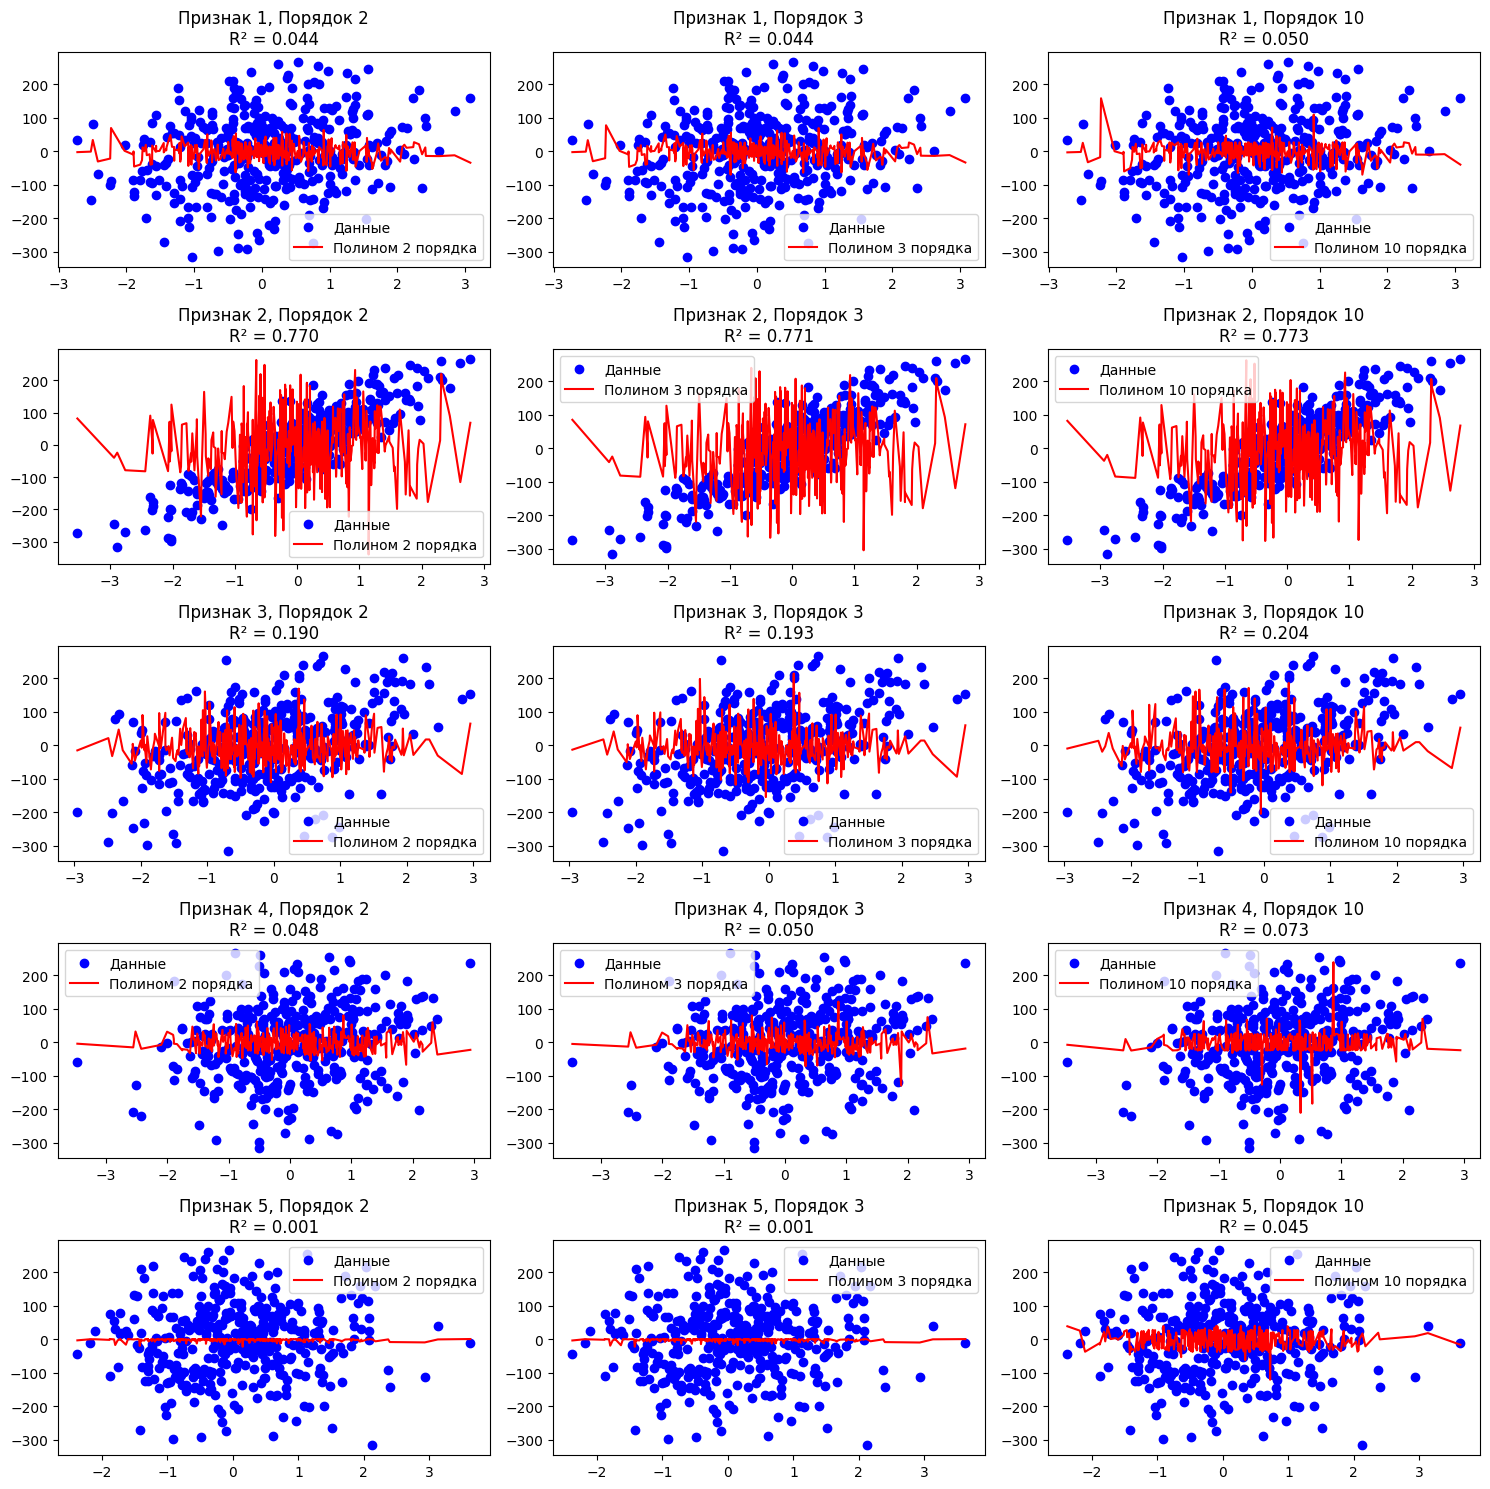

Признак 1:
 Порядок 2: R² = 0.044
 Порядок 3: R² = 0.044
 Порядок 10: R² = 0.050
Признак 2:
 Порядок 2: R² = 0.770
 Порядок 3: R² = 0.771
 Порядок 10: R² = 0.773
Признак 3:
 Порядок 2: R² = 0.190
 Порядок 3: R² = 0.193
 Порядок 10: R² = 0.204
Признак 4:
 Порядок 2: R² = 0.048
 Порядок 3: R² = 0.050
 Порядок 10: R² = 0.073
Признак 5:
 Порядок 2: R² = 0.001
 Порядок 3: R² = 0.001
 Порядок 10: R² = 0.045


In [19]:
from sklearn.preprocessing import PolynomialFeatures


def polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    r2_score = model.score(x_poly, y) # коэффициент детерминации

    return y_pred, r2_score, model.coef_, model.intercept_

# полиномиальная регрессия для каждого признака
degrees = [2, 3, 10]
fig, axes = plt.subplots(len(x.columns), len(degrees), figsize=(15, 15))

for i in range(len(x.columns)):  # проход по признакам
    for j, degree in enumerate(degrees):  # проход по порядкам полинома
        y_pred, r2, coef, intercept = polynomial_regression(x[[i]], y, degree)

        ax = axes[i, j] # элемент массива axes при построении subplots()
        ax.scatter(x[i], y, color='blue', label='Данные')
        ax.plot(np.sort(x[i].values), np.sort(y_pred), color='red', label=f'Полином {degree} порядка')
        ax.set_title(f'Признак {i+1}, Порядок {degree}\nR² = {r2:.3f}')
        ax.legend()

plt.tight_layout()
plt.show()

for i in range(len(x.columns)):
    print(f"Признак {i+1}:")
    for degree in degrees:
        _, r2, coef, intercept = polynomial_regression(x[[i]], y, degree)

        coef_str = ', '.join([f'{c:.3f}' for c in coef[0, 1:]])  # пропускаем свободный член
        print(f" Порядок {degree}: R² = {r2:.3f}")


Признак 1 слабо влияет на целевую переменную (низкое значение R^2).

Признак 2 значительно влияет. Полином 10 чуть лучше, но разница минимальна.

Признак 3 - слабое влияние. Увеличение степени полинома дает увеличение точности.

Признак 4 почти не влияет.

Признак 5 слабо связан с целевой переменной. Улучшение на полиноме 10, возможно, нелинейная зависимость.

*4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.*

In [ ]:
def plot_polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    r2_score = model.score(x_poly, y)

    return r2_score, model.coef_, model.intercept_

results = []

# для каждого признака и степени полинома вычисляем R²
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        r2, coef, intercept = plot_polynomial_regression(x[[i]], y, degree)
        results.append({
            'Признак': i + 1,
            'Порядок полинома': degree,
            'R²': r2
        })

results_df = pd.DataFrame(results) # DataFrame для сводной таблицы

print(results_df)


Признак 1, 4 - недообучение (R^2 остается низким).

Признак 2, 3 - хорошие показатели.

Признак 5 - переобучение (скачок при 10).

*5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.*

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


def compute_metrics(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    # коэффициент детерминации
    r2_score = model.score(x_poly, y)

    # метрики
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # средняя абсолютная процентная ошибка (MAPE)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    return r2_score, mae, mse, rmse, mape, model.coef_, model.intercept_

results = []

for i in range(x.shape[1]):  # для каждого признака
    for degree in [2, 3, 10]:  # для каждого порядка полинома
        r2, mae, mse, rmse, mape, coef, intercept = compute_metrics(x[[i]], y, degree)
        results.append({
            'Признак': i + 1,
            'Порядок полинома': degree,
            'R²': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape
        })

results_df = pd.DataFrame(results)

print(results_df)


    Признак  Порядок полинома        R²        MAE           MSE        RMSE  \
0         1                 2  0.043672  85.778988  11491.909255  107.200323   
1         1                 3  0.043765  85.684404  11490.787323  107.195090   
2         1                10  0.050356  84.854224  11411.586520  106.825028   
3         2                 2  0.769994  42.132303   2763.909753   52.572899   
4         2                 3  0.771118  42.061248   2750.401156   52.444267   
5         2                10  0.772677  41.690871   2731.672893   52.265408   
6         3                 2  0.190008  77.458415   9733.431563   98.658155   
7         3                 3  0.192802  77.570200   9699.859735   98.487866   
8         3                10  0.204409  76.815422   9560.372197   97.777156   
9         4                 2  0.047943  83.446884  11440.588266  106.960686   
10        4                 3  0.050312  83.444329  11412.119234  106.827521   
11        4                10  0.072667 

*6. Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.*

   Порядок полинома  Время обучения (сек.)
0                 2               0.003322
1                 3               0.051562
2                10               0.183888


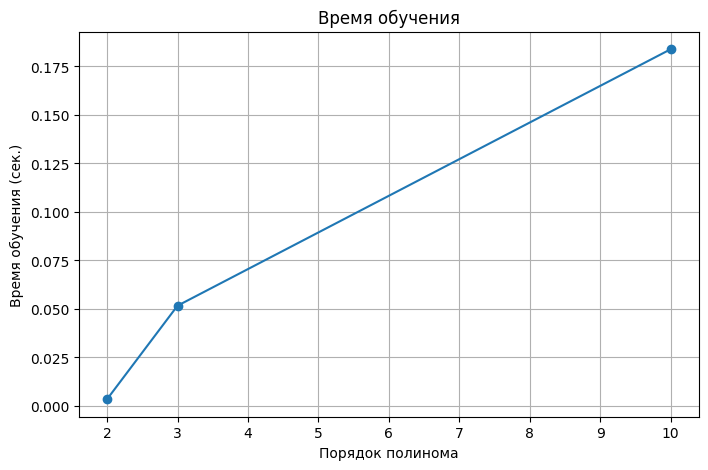

In [25]:
import time


def measure_training_time(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()

    # засекаем время обучения
    start_time = time.time()
    model.fit(x_poly, y)
    end_time = time.time()

    training_time = end_time - start_time
    return training_time

training_times = []

for degree in [2, 3, 10]:
    training_time = measure_training_time(x, y, degree)
    training_times.append({
        'Порядок полинома': degree,
        'Время обучения (сек.)': training_time
    })

training_times_df = pd.DataFrame(training_times)

print(training_times_df)

# график время обучения
plt.figure(figsize=(8, 5))
plt.plot(training_times_df['Порядок полинома'], training_times_df['Время обучения (сек.)'], marker='o')
plt.title('Время обучения')
plt.xlabel('Порядок полинома')
plt.ylabel('Время обучения (сек.)')
plt.grid(True)
plt.show()


С увеличением степени полинома время обучения возрастает. Это связано с тем, что увеличивается кол-во параметров модели и сложности вычислений.